# Vehicle Efficiencies

## Source
**Analysis and Scenario Development in Uganda’s Transport Sector.**
* Tables from Mutenyo t al., (2015):
  - 4-5 Average fuel efficiencies of petrol vehicles (L/100kms)
  - 4-6 Average fuel efficiencies of diesel vehicles (L/100kms)
  - 5-4: URC annual fuel consumption (*Basing on an average fuel consumption of 19Ltrs/1000NTK (i.e., 9.5Ltrs/1000GTK) for the locomotives*).
  - 6-4 Fuel Usage and efficiency (km/L) of UNRA Ferries
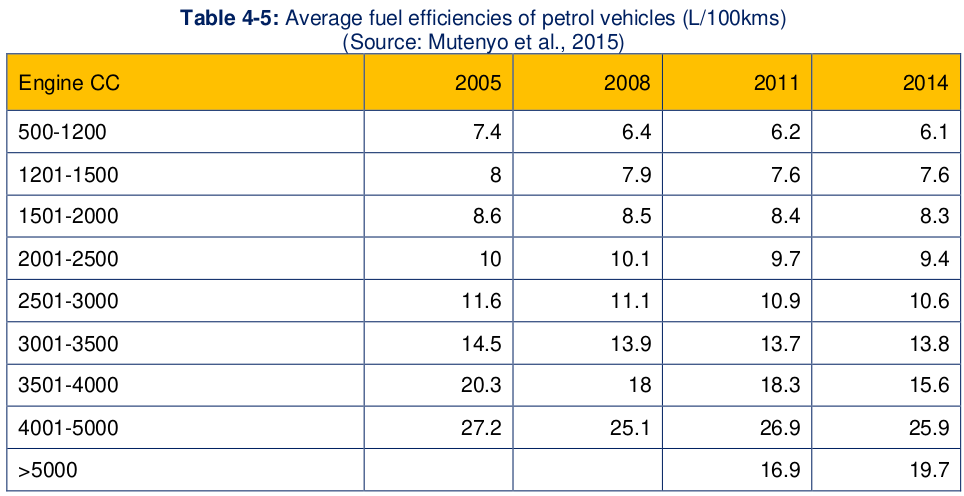
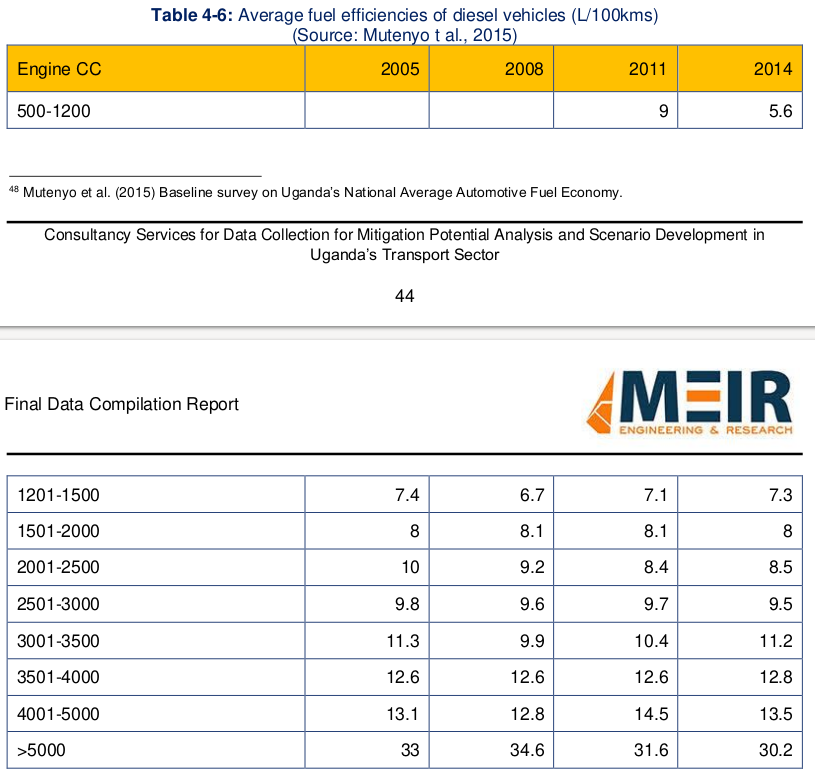
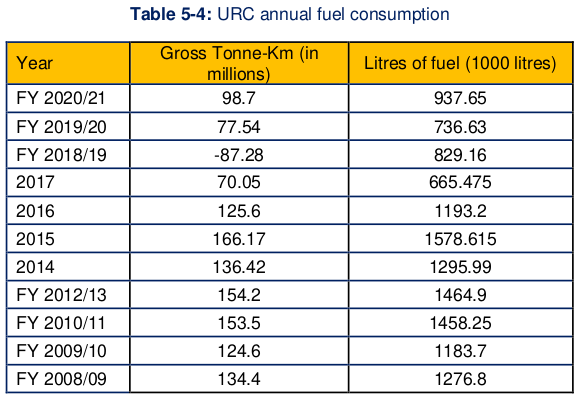
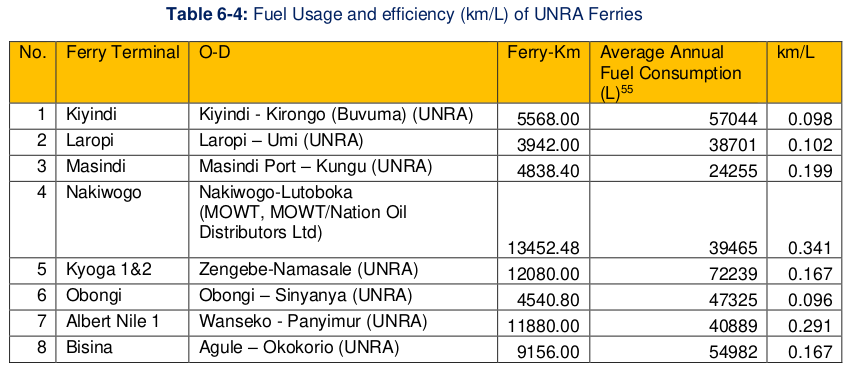




In [25]:
import numpy as np
import pandas as pd
import os

import sisepuede.core.support_classes as sc
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.utilities._toolbox as sf
import utils.common_data_needs as cdn

from utils.utils import EDAUtils

# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

edau = EDAUtils()


In [22]:
## Get SSP Elements
dict_ssp = cdn._setup_sisepuede_elements()
matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )

# setup region
_REGION_NAME = "uganda"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso")

# SET SOME GLOBALS

# uganda data frame
df_uganda = cdn.get_raw_ssp_inputs()


## Fuel Efficiency by Fuel Type in SISEPUEDE 
* Fuel Efficiency Biofuels
* Fuel Efficiency Diesel
* Fuel Efficiency Gasoline
* Fuel Efficiency Hydrocarbon Gas Liquids
* Fuel Efficiency Hydrogen
* Fuel Efficiency Kerosene
* Fuel Efficiency Natural Gas

## ROAD TRANSPORT SUB-SECTOR BASELINE DATA

The analysis reports information about Average fuel efficiencies of petrol and gasoline vehicles by Engine CC. 


Engine size for road transport vehicles, specifically trucks and buses, varies widely depending on the vehicle's size, intended use, and load capacity. Smaller trucks, like those used for local deliveries, might have engines between 1500 cc and 2500 cc, while larger trucks designed for heavy loads and long distances can have engines ranging from 3000 cc to 16000 cc or more, according to truck information sites and [Trucksfloor](https://trucksfloor.com/en/blog/truck-engine-cc)


Motorcycles:

* **100cc - 150cc**: Common for fuel-efficient, commuter-friendly bikes like the Hero Splendor or Honda Shine.
* **300cc - 500cc**: Suitable for adventure bikes like the KTM Duke 390 or Royal Enfield Himalayan, offering a balance of power and functionality.
* **600cc and above**: Typically found in high-performance motorcycles, providing significant power and speed. 

Cars:
* **1200cc - 1500cc**: Ideal for fuel-efficient, compact cars like the Maruti Suzuki Swift or Hyundai i20. 

* **1500cc - 2000cc**: Commonly found in mid-size sedans and small SUVs, offering a good balance of performance and space, such as the Hyundai Creta. 
* **2000cc and above**: Typically used in larger SUVs, trucks, and high-performance vehicles, like the Toyota Fortuner, providing more power for off-road or towing capabilities. 


Trucks:

* **Small Commercial Vehicles (SCV)**: 625 cc to 2956 cc. 
* **Light Commercial Vehicles (LCV)**: 2000 cc to 3783 cc. 
* **Intermediate Commercial Vehicles (ICV)**: 2953 cc to 7200 cc. 
* **Medium and Heavy Commercial Vehicles (MHCV)**: 5000 cc to 16000 cc. 


Buses:
* Engine sizes vary depending on the bus size and intended use, but are generally within the same range as heavy-duty trucks

SISEPUEDE use the next categories associated with Road transport:

|    | Category Name     | $CAT-TRANSPORTATION$   | Description                                                                                                                                                                                                                                                                      |
|---:|:------------------|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  1 | Heavy Duty Road   | road_heavy_freight     | Private heavy vehicles primarily designed for freight transportat, including heavy duty trucks (e.g., semis). Excludes busses. Driven by freight demand.                                                                                                                         |
|  5 | Light Duty Road   | road_light             | Transportation from public and private road-going automobiles, inluding cars and light duty trucks. NOTE: public fleets of cars (e.g., postal delivery vehicles or light-duty utility service vehicles) should be included here. Driven by growth in public and private demands. |
|  6 | Public Heavy Road | public                 | Road-based public transport, including busses, tolleys, light rail, and streetcars.                                                                                                                                                                                              |
|  7 | Regional Road     | road_heavy_regional    | Regional heavy transit driven by population growth. Primarily driven by busses.                                                                                                                                                                                                  |

We propose the nex crosswalk:
| Category Name     | Category Transport   | Vehicle Type                                | Engine CC           |
|:------------------|:---------------------|:--------------------------------------------|:--------------------|
| Light Duty Road   | road_light           | Small Commercial Vehicles (SCV)             | 625 cc to 2956 cc   |
| Public Heavy Road | public               | Medium and Heavy Commercial Vehicles (MHCV) | 5000 cc to 16000 cc |
| Heavy Duty Road   | road_heavy_freight   | Medium and Heavy Commercial Vehicles (MHCV) | 5000 cc to 16000 cc |
| Regional Road     | road_heavy_regional  | Medium and Heavy Commercial Vehicles (MHCV) | 5000 cc to 16000 cc |

In [31]:
# Average fuel efficiencies of petrol vehicles (L/100kms)
fe_petrol_vehicle = pd.DataFrame(
    [['500-1200', 7.4, 6.4, 6.2, 6.1],
       ['1201-1500', 8.0, 7.9, 7.6, 7.6],
       ['1501-2000', 8.6, 8.5, 8.4, 8.3],
       ['2001-2500', 10.0, 10.1, 9.7, 9.4],
       ['2501-3000', 11.6, 11.1, 10.9, 10.6],
       ['3001-3500', 14.5, 13.9, 13.7, 13.8],
       ['3501-4000', 20.3, 18.0, 18.3, 15.6],
       ['4001-5000', 27.2, 25.1, 26.9, 25.9],
       ['>5000', 0.0, 0.0, 16.9, 19.7]],
    columns = ["Engine CC", "2005", "2008", "2011", "2014"]
)
fe_petrol_vehicle

,Engine CC,2005,2008,2011,2014
0,500-1200,7.4,6.4,6.2,6.1
1,1201-1500,8.0,7.9,7.6,7.6
2,1501-2000,8.6,8.5,8.4,8.3
3,2001-2500,10.0,10.1,9.7,9.4
4,2501-3000,11.6,11.1,10.9,10.6
5,3001-3500,14.5,13.9,13.7,13.8
6,3501-4000,20.3,18.0,18.3,15.6
7,4001-5000,27.2,25.1,26.9,25.9
8,>5000,0.0,0.0,16.9,19.7


In [70]:
# Average fuel efficiencies of diesel vehicles (L/100kms)
fe_diesel_vehicle = pd.DataFrame(
    [['500-1200', 0.0, 0.0, 9.0, 5.6],
           ['1201-1500', 7.4, 6.7, 7.1, 7.3],
           ['1501-2000', 8.0, 8.1, 8.1, 8.0],
           ['2001-2500', 10.0, 9.2, 8.4, 8.5],
           ['2501-3000', 9.8, 9.6, 9.7, 9.5],
           ['3001-3500', 11.3, 9.9, 10.4, 11.2],
           ['3501-4000', 12.6, 12.6, 12.6, 12.8],
           ['4001-5000', 13.1, 12.8, 14.5, 13.5],
           ['>5000', 33.0, 34.6, 31.6, 30.2]],
    columns = ["Engine CC", "2005", "2008", "2011", "2014"]
)
fe_diesel_vehicle

,Engine CC,2005,2008,2011,2014
0,500-1200,0.0,0.0,9.0,5.6
1,1201-1500,7.4,6.7,7.1,7.3
2,1501-2000,8.0,8.1,8.1,8.0
3,2001-2500,10.0,9.2,8.4,8.5
4,2501-3000,9.8,9.6,9.7,9.5
5,3001-3500,11.3,9.9,10.4,11.2
6,3501-4000,12.6,12.6,12.6,12.8
7,4001-5000,13.1,12.8,14.5,13.5
8,>5000,33.0,34.6,31.6,30.2


In [88]:
## Get values for 2014 and convert L/100kms to km/L
fe_diesel_vehicle_2014 = (fe_diesel_vehicle.set_index("Engine CC")[["2014"]]**-1*100)#.reset_index()
fe_petrol_vehicle_2014 = (fe_petrol_vehicle.set_index("Engine CC")[["2014"]]**-1*100)#.reset_index()


In [89]:
## Impute data to SSP transport category
## NOTE : I assume that petrol is equal to gasoline in the ssp category
imputed_data = {
    "gasoline" : {
        "road_light" : fe_petrol_vehicle_2014.loc["2501-3000","2014"], # 
        "public" : fe_petrol_vehicle_2014.loc[">5000","2014"],
        "road_heavy_freight" : fe_petrol_vehicle_2014.loc[">5000","2014"],
        "road_heavy_regional" : fe_petrol_vehicle_2014.loc[">5000","2014"],
    },
    "diesel" : {
        "road_light" : fe_diesel_vehicle_2014.loc["2501-3000","2014"], # 
        "public" : fe_diesel_vehicle_2014.loc[">5000","2014"],
        "road_heavy_freight" : fe_diesel_vehicle_2014.loc[">5000","2014"],
        "road_heavy_regional" : fe_diesel_vehicle_2014.loc[">5000","2014"],
    } 
}
imputed_data

{'gasoline': {'road_light': 9.433962264150944,
  'public': 5.0761421319796955,
  'road_heavy_freight': 5.0761421319796955,
  'road_heavy_regional': 5.0761421319796955},
 'diesel': {'road_light': 10.526315789473683,
  'public': 3.3112582781456954,
  'road_heavy_freight': 3.3112582781456954,
  'road_heavy_regional': 3.3112582781456954}}

In [90]:
## Build the road data ssp data frame
def build_var_name(trns_cat : str,
                   fuel_type : str) -> str:
    return f"fuelefficiency_trns_{trns_cat}_{fuel_type}_km_per_litre"

road_data_ssp = pd.DataFrame({build_var_name(trns_category, fuel_type) : [trns_categories[trns_category]]
 for fuel_type, trns_categories in imputed_data.items() 
 for trns_category in trns_categories})

road_data_ssp


,fuelefficiency_trns_road_light_gasoline_km_per_litre,fuelefficiency_trns_public_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_freight_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_regional_gasoline_km_per_litre,fuelefficiency_trns_road_light_diesel_km_per_litre,fuelefficiency_trns_public_diesel_km_per_litre,fuelefficiency_trns_road_heavy_freight_diesel_km_per_litre,fuelefficiency_trns_road_heavy_regional_diesel_km_per_litre
0,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258


In [94]:
## Since we have no additional information, let's assume the values are constant until the year 2100
df_road_data_years = pd.DataFrame({"year" : range(2014,2101)})

## Merge dataframes
df_fuelefficiency_trns_road_data = df_road_data_years.merge(right=road_data_ssp, how="cross")
df_fuelefficiency_trns_road_data.head(5)


,year,fuelefficiency_trns_road_light_gasoline_km_per_litre,fuelefficiency_trns_public_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_freight_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_regional_gasoline_km_per_litre,fuelefficiency_trns_road_light_diesel_km_per_litre,fuelefficiency_trns_public_diesel_km_per_litre,fuelefficiency_trns_road_heavy_freight_diesel_km_per_litre,fuelefficiency_trns_road_heavy_regional_diesel_km_per_litre
0,2014,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258
1,2015,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258
2,2016,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258
3,2017,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258
4,2018,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258


### VALIDATION ROAD TRANSPORT

Comparing fuelefficiency_trns_road_light_gasoline_km_per_litre...


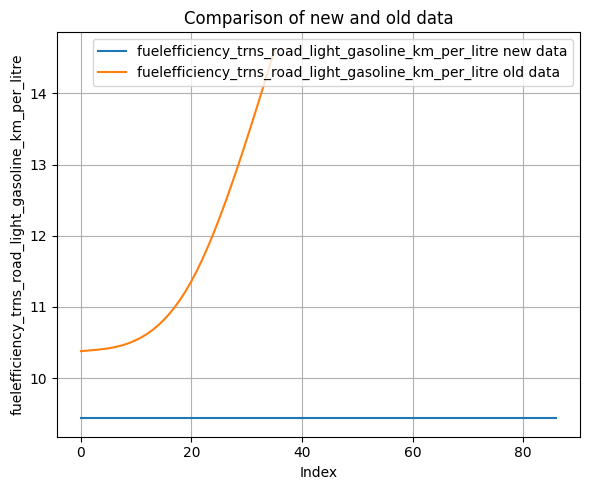

Comparing fuelefficiency_trns_public_gasoline_km_per_litre...


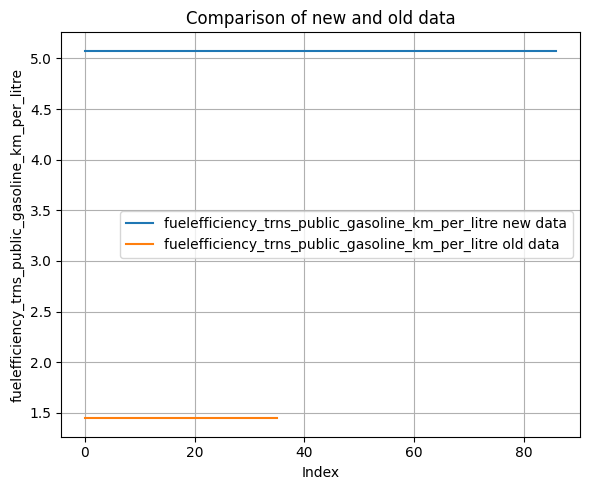

Comparing fuelefficiency_trns_road_heavy_freight_gasoline_km_per_litre...


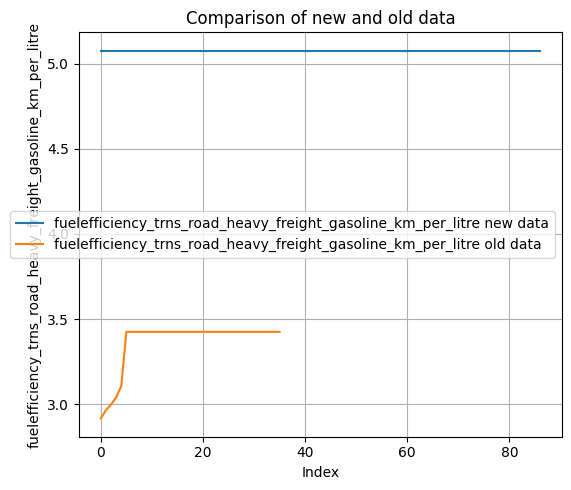

Comparing fuelefficiency_trns_road_heavy_regional_gasoline_km_per_litre...


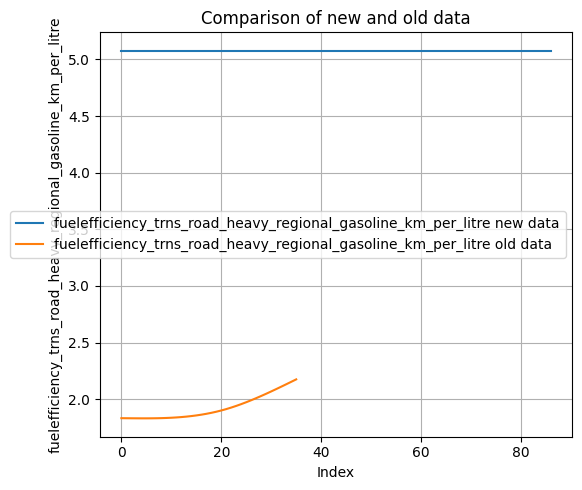

Comparing fuelefficiency_trns_road_light_diesel_km_per_litre...


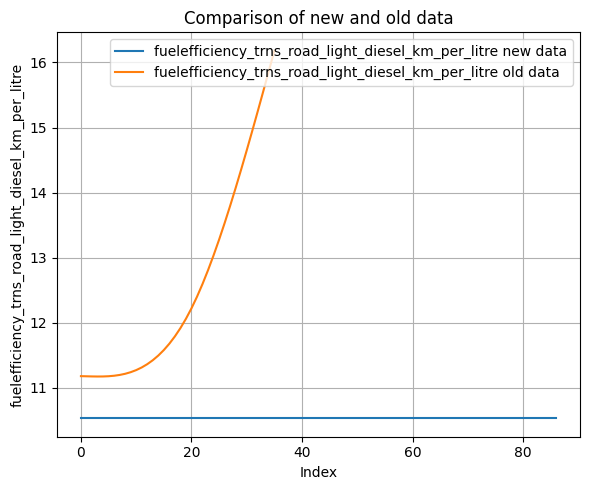

Comparing fuelefficiency_trns_public_diesel_km_per_litre...


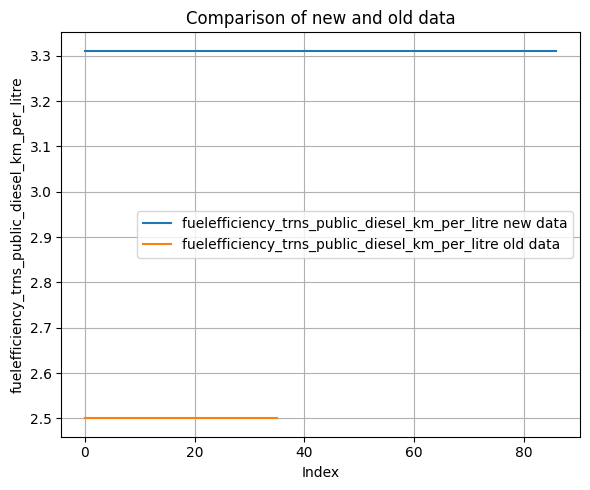

Comparing fuelefficiency_trns_road_heavy_freight_diesel_km_per_litre...


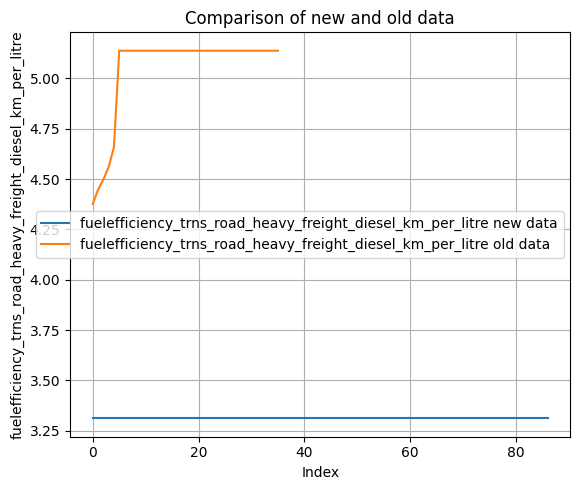

Comparing fuelefficiency_trns_road_heavy_regional_diesel_km_per_litre...


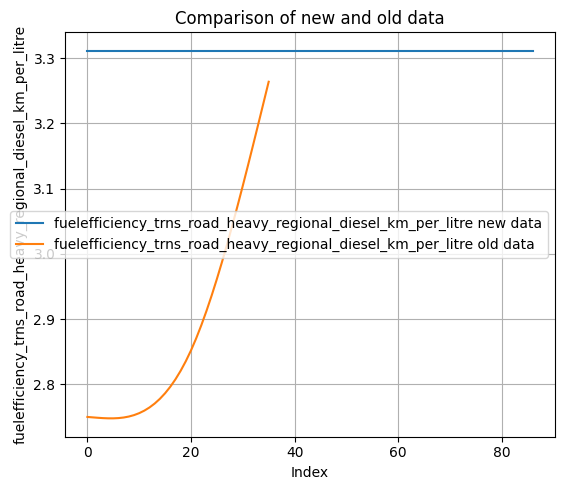

In [96]:
for col in df_fuelefficiency_trns_road_data.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_fuelefficiency_trns_road_data, df_uganda, [col])

## RAILWAY TRANSPORT SUB-SECTOR BASELINE DATA
According to the URC, the Corporation has 21 Shunting Locomotives of which 8 are no longer
operational. The active shunting locomotives are **Diesel Hydraulic** of Classes 62 (760HP) and Class 73
(1230HP) manufactured by Thyssen Henschel between 1978-1990 with an average age of 40 years.
On the other hand, the 3 active Mainline Locomotives are Diesel Electric of Class 96,93 & 94 (2600 HP)
with an average age of 47 years old. These belong to Stanbic and KR resepctively
Basing on an average fuel consumption of 19Ltrs/1000NTK (i.e., 9.5Ltrs/1000GTK) for the locomotives,
Table 5-4 provides estimates of fuel consumed by the freight locomotives over the last 10 years


SISEPUEDE reports the next categories associated with Road transport:

|    | Category Name        | $CAT-TRANSPORTATION$   | Description                                                                                                                                                                     |
|---:|:---------------------|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  2 | Heavy Freight Rail   | rail_freight           | Freight rail transport, including heavy freight and heavy passenger. Excludes light rail, trolleys, streetcars (see public transportation). Driven by growth in freight demand. |
|  3 | Heavy Passenger Rail | rail_passenger         | Heavy passenger rail, inlcuidng intra-national rail networks, high-speed rail, regional public rail, and others. Driven by demand for regional travel.

In [106]:
fe_diesel_rail = pd.DataFrame([[2021, 98.7, 937.65],
       [2020, 77.54, 736.63],
       [2019, 87.28, 829.16],
       [2018,np.nan, np.nan],
       [2017, 70.05, 665.475],
       [2016, 125.6, 1193.2],
       [2015, 166.17, 1578.615],
       [2014, 136.42, 1295.99],
       [2013, 154.2, 1464.9],
       [2012, np.nan, np.nan],
       [2011, 153.5, 1458.25],
       [2010, 124.6, 1183.7],
       [2009, 134.4, 1276.8]],
columns = ["Year", "Gross Tonne-Km (in millions)", "Litres of fuel (1000 litres)"]
            )
fe_diesel_rail = fe_diesel_rail.interpolate()
fe_diesel_rail

,Year,Gross Tonne-Km (in millions),Litres of fuel (1000 litres)
0,2021,98.700,937.6500
1,2020,77.540,736.6300
2,2019,87.280,829.1600
3,2018,78.665,747.3175
4,2017,70.050,665.4750
5,2016,125.600,1193.2000
6,2015,166.170,1578.6150
7,2014,136.420,1295.9900
8,2013,154.200,1464.9000
9,2012,153.850,1461.5750


Given an average fuel consumption of 19Ltrs/1000NTK (i.e., 9.5Ltrs/1000GTK) for the locomotives, then:

1000 Tonne-km/9.5L ---> 1 Tonne-Km/0.0095L ---> 1000 kg-km/0.0095L ---> 1000^-1 km-kg/0.0095L

The density of diesel fuel is typically around 830-860 kg/m³ (kilograms per cubic meter) = 0.83-0.86 kg/L, so:

(1000^-1)(0.83) (km/kg)(kg/L)/0.0095L ---> (1000^-1)(0.83) km/L/0.0095L ---> (1000^-1)(0.83)/0.0095 km/L

The fuel efficiency is equal to:

**0.08737 km/L**

According to information from [Wikipedia](https://en.wikipedia.org/wiki/Energy_efficiency_in_transport), the typical efficiency of trains in the USA is 0.478 km per liter


In [113]:
imputed_data_rail = {
    "diesel" : {
        "rail_freight" : (0.83/1000)/0.0095,
        "rail_passenger" : (0.83/1000)/0.0095,
    } 
}


In [114]:
rail_data_ssp = pd.DataFrame({build_var_name(trns_category, fuel_type) : [trns_categories[trns_category]]
 for fuel_type, trns_categories in imputed_data_rail.items() 
 for trns_category in trns_categories})

rail_data_ssp

,fuelefficiency_trns_rail_freight_diesel_km_per_litre,fuelefficiency_trns_rail_passenger_diesel_km_per_litre
0,0.087368,0.087368


In [115]:
## Since we have no additional information, let's assume the values are constant until the year 2100
## Merge dataframes
df_fuelefficiency_trns_rail_data = df_road_data_years.merge(right=rail_data_ssp, how="cross")
df_fuelefficiency_trns_rail_data.head(5)

,year,fuelefficiency_trns_rail_freight_diesel_km_per_litre,fuelefficiency_trns_rail_passenger_diesel_km_per_litre
0,2014,0.087368,0.087368
1,2015,0.087368,0.087368
2,2016,0.087368,0.087368
3,2017,0.087368,0.087368
4,2018,0.087368,0.087368


### VALIDATION ROAD TRANSPORT

Comparing fuelefficiency_trns_rail_freight_diesel_km_per_litre...


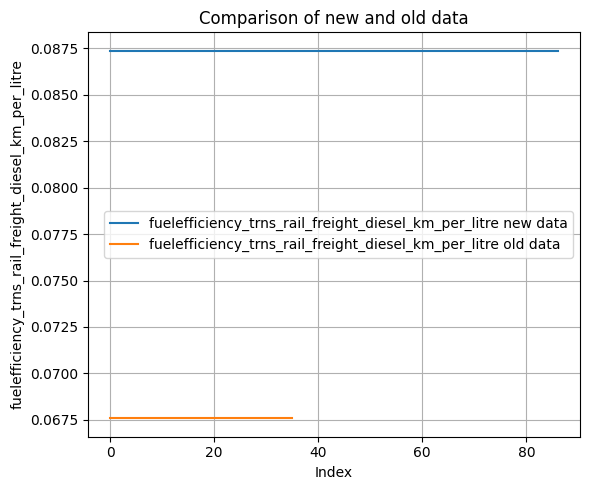

Comparing fuelefficiency_trns_rail_passenger_diesel_km_per_litre...


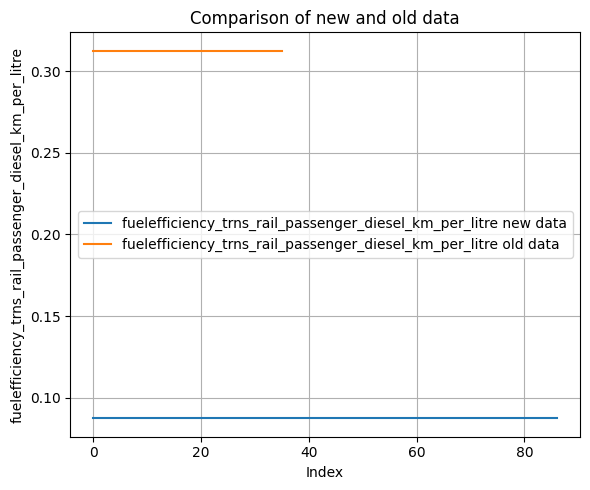

In [117]:
for col in df_fuelefficiency_trns_rail_data.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_fuelefficiency_trns_rail_data, df_uganda, [col])

## IN-LAND WATER TRANSPORT SUB-SECTOR BASELINE DATA
### Fuel Efficiency

Table 6-4 provides an indication of the fuel efficiency of major UNRA ferries. These are derived from
annual averages of km travelled and fuel consumed by each ferry. Ferry-km are derived from the
voyage distances between ferry terminals and average number of trips per year

In [119]:
fe_diesel_water_borne = pd.DataFrame(
    [['Kiyindi', 0.098],
       ['Laropi', 0.102],
       ['Masindi', 0.199],
       ['Nakiwogo', 0.341],
       ['Kyoga 1&2', 0.167],
       ['Obongi', 0.096],
       ['Albert Nile 1', 0.291],
       ['Bisina', 0.167]
    ],
     columns = ["Ferry Terminal", "km/L"]
)
fe_diesel_water_borne

,Ferry Terminal,km/L
0,Kiyindi,0.098
1,Laropi,0.102
2,Masindi,0.199
3,Nakiwogo,0.341
4,Kyoga 1&2,0.167
5,Obongi,0.096
6,Albert Nile 1,0.291
7,Bisina,0.167


In [122]:
## Get the average km/l
imputed_data_water_borne = {
    "diesel" : {
        "water_borne" : np.mean(fe_diesel_water_borne["km/L"]),
    } 
}
imputed_data_water_borne

{'diesel': {'water_borne': 0.18262499999999998}}

In [124]:
water_borne_data_ssp = pd.DataFrame({build_var_name(trns_category, fuel_type) : [trns_categories[trns_category]]
 for fuel_type, trns_categories in imputed_data_water_borne.items() 
 for trns_category in trns_categories})

water_borne_data_ssp

,fuelefficiency_trns_water_borne_diesel_km_per_litre
0,0.182625


In [125]:
## Since we have no additional information, let's assume the values are constant until the year 2100
## Merge dataframes
df_fuelefficiency_trns_water_borne_data = df_road_data_years.merge(right=water_borne_data_ssp, how="cross")
df_fuelefficiency_trns_water_borne_data.head(5)

,year,fuelefficiency_trns_water_borne_diesel_km_per_litre
0,2014,0.182625
1,2015,0.182625
2,2016,0.182625
3,2017,0.182625
4,2018,0.182625


### Validation IN-LAND WATER TRANSPORT

Comparing fuelefficiency_trns_water_borne_diesel_km_per_litre...


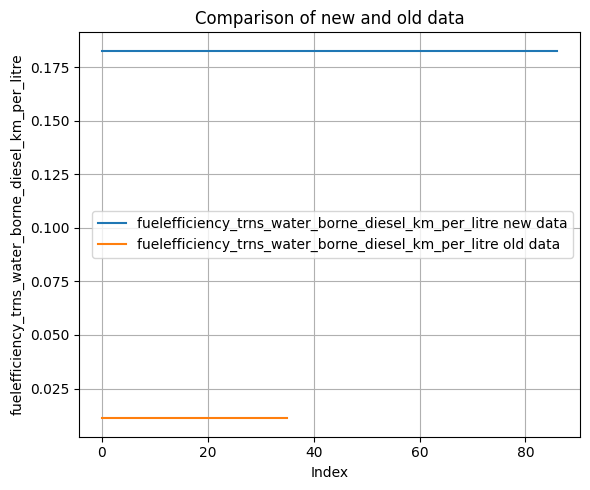

In [126]:
for col in df_fuelefficiency_trns_water_borne_data.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_fuelefficiency_trns_water_borne_data, df_uganda, [col])

## SAVE

In [130]:
## Join all dataframes
df_fuelefficiency_trns_data = pd.concat([
    df_fuelefficiency_trns_road_data.set_index("year"),
    df_fuelefficiency_trns_rail_data.set_index("year"),
    df_fuelefficiency_trns_water_borne_data.set_index("year")
], axis = 1)
df_fuelefficiency_trns_data = df_fuelefficiency_trns_data.reset_index()
df_fuelefficiency_trns_data

,year,fuelefficiency_trns_road_light_gasoline_km_per_litre,fuelefficiency_trns_public_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_freight_gasoline_km_per_litre,fuelefficiency_trns_road_heavy_regional_gasoline_km_per_litre,fuelefficiency_trns_road_light_diesel_km_per_litre,fuelefficiency_trns_public_diesel_km_per_litre,fuelefficiency_trns_road_heavy_freight_diesel_km_per_litre,fuelefficiency_trns_road_heavy_regional_diesel_km_per_litre,fuelefficiency_trns_rail_freight_diesel_km_per_litre,fuelefficiency_trns_rail_passenger_diesel_km_per_litre,fuelefficiency_trns_water_borne_diesel_km_per_litre
0,2014,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
1,2015,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
2,2016,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
3,2017,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
4,2018,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
...,...,...,...,...,...,...,...,...,...,...,...,...
82,2096,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
83,2097,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
84,2098,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625
85,2099,9.433962,5.076142,5.076142,5.076142,10.526316,3.311258,3.311258,3.311258,0.087368,0.087368,0.182625


In [131]:
df_fuelefficiency_trns_data.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "df_fuelefficiency_trns.csv"), index=False)